In [41]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH  = os.path.join("datasets", "housing")
HOUSING_URL   = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

print(HOUSING_URL)
print(HOUSING_PATH)

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
    if not os.path.isdir(housing_path): 
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    
    print(tgz_path)
    
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz
datasets/housing


In [42]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    print(csv_path)
    return pd.read_csv(csv_path)

In [66]:
housing = load_housing_data()
housing.head()

datasets/housing/housing.csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

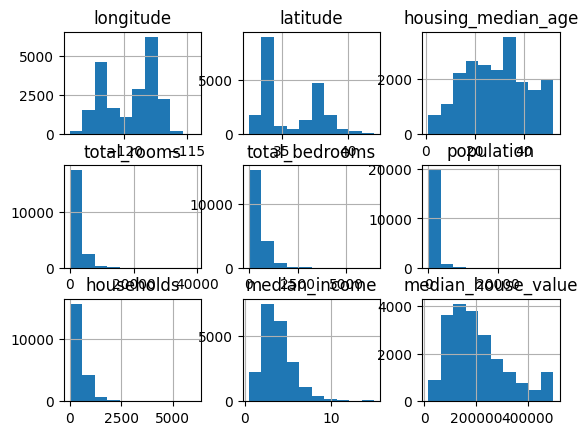

In [62]:
housing.hist()

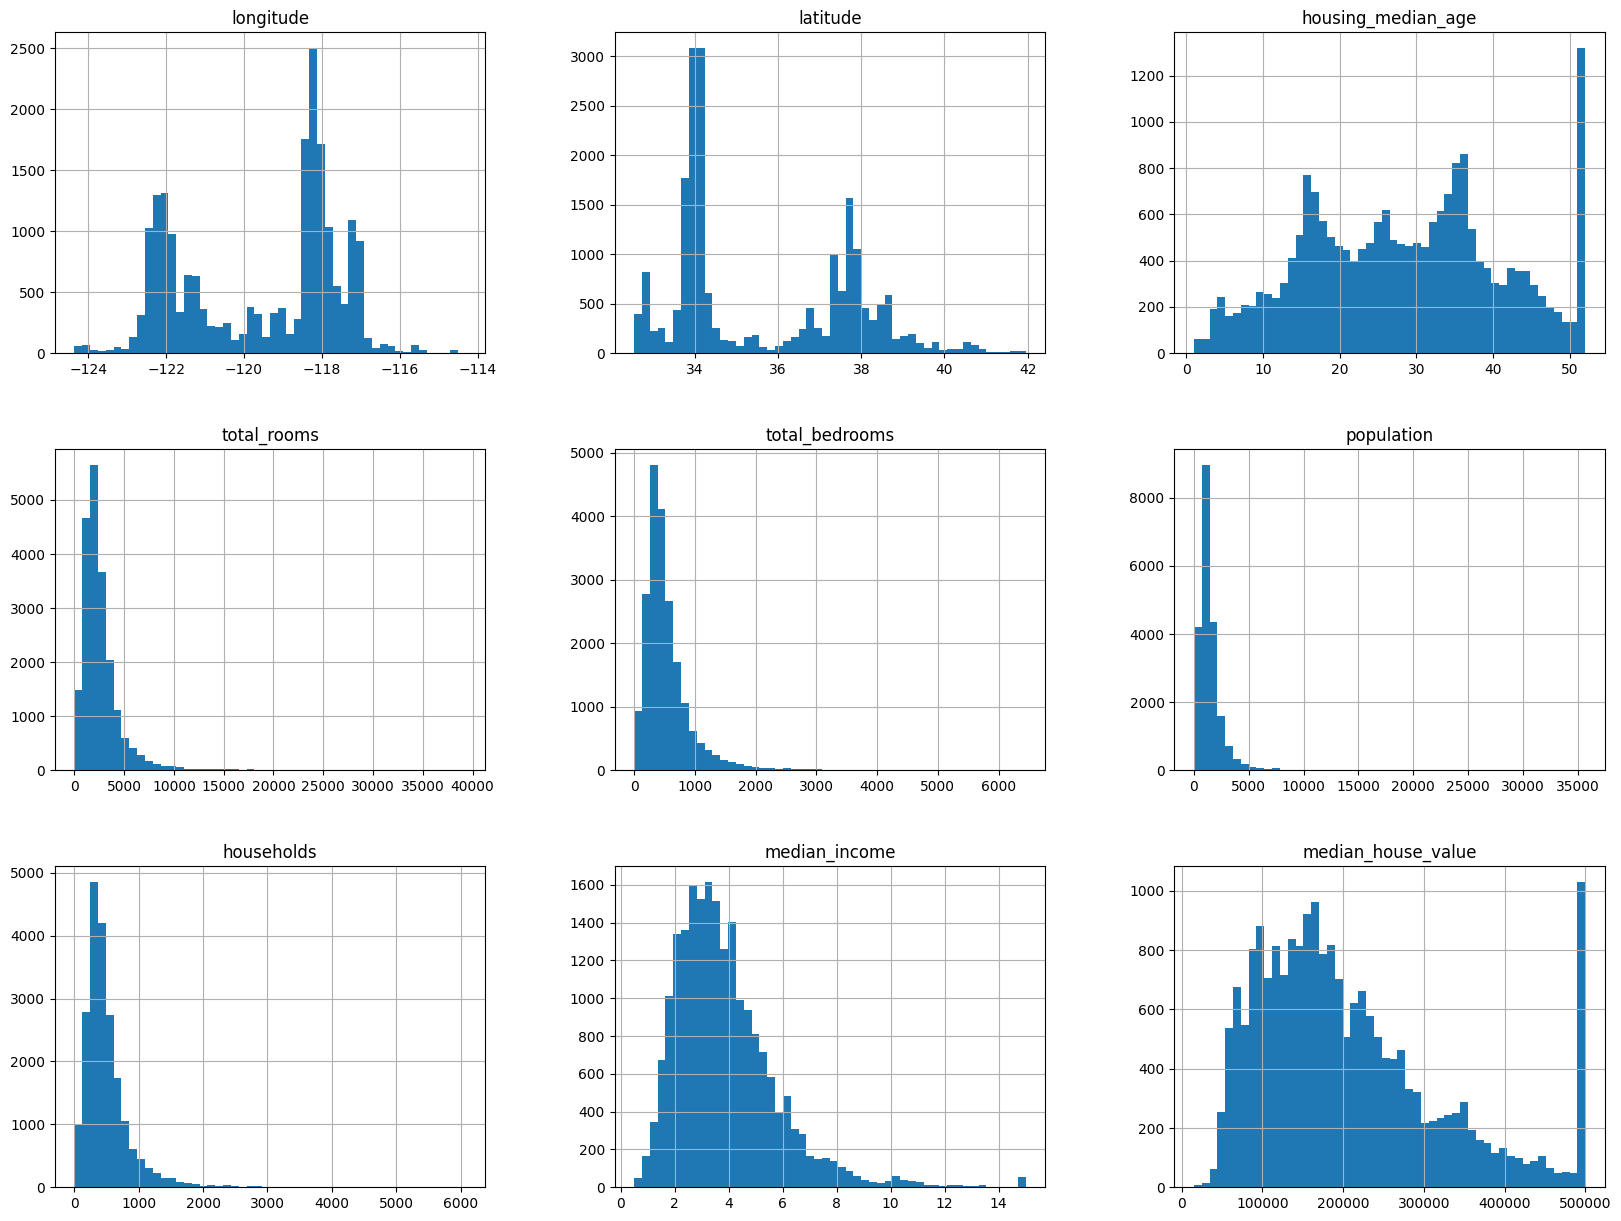

In [45]:
%matplotlib inline  
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))

plt.show()


In [63]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [83]:
train_set, test_set = split_train_test(housing, 0.2)

print(len(train_set), "train +", len(test_set), "test")


16512 train + 4128 test


In [85]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [86]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
   strat_train_set = housing.loc[train_index]
   strat_test_set = housing.loc[test_index]


In [87]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

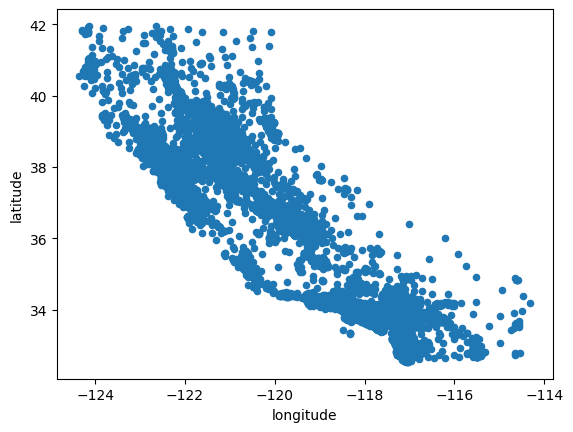

In [53]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

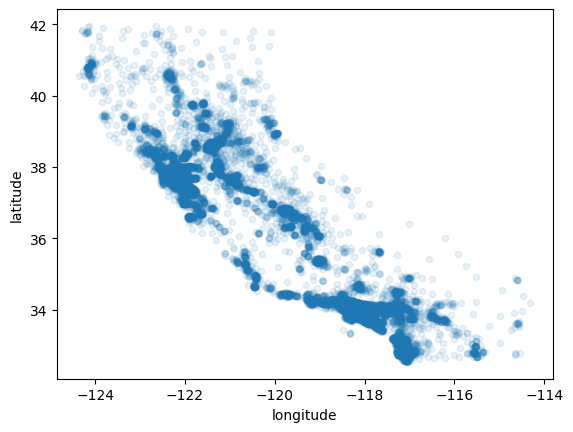

In [55]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

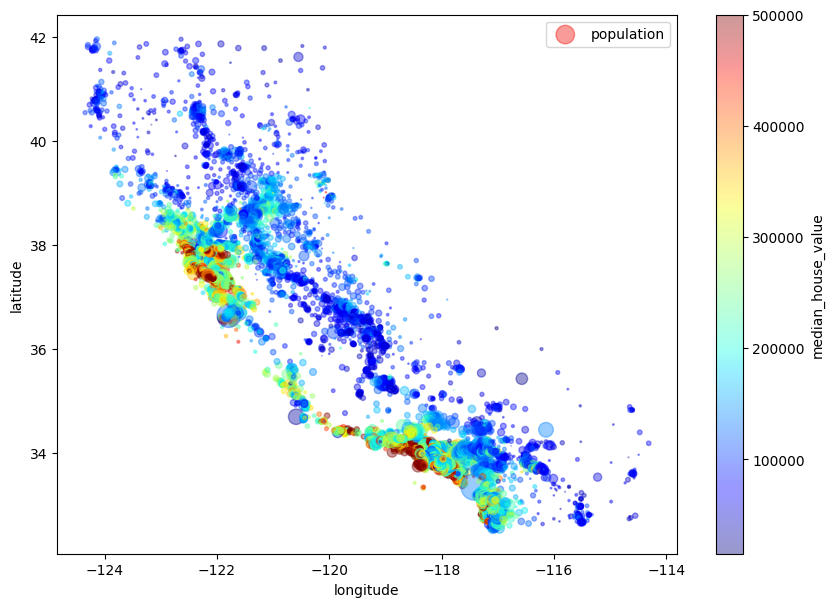

In [67]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
       s=housing["population"]/100, label="population", figsize=(10,7),
       c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
   )
plt.legend()

In [69]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

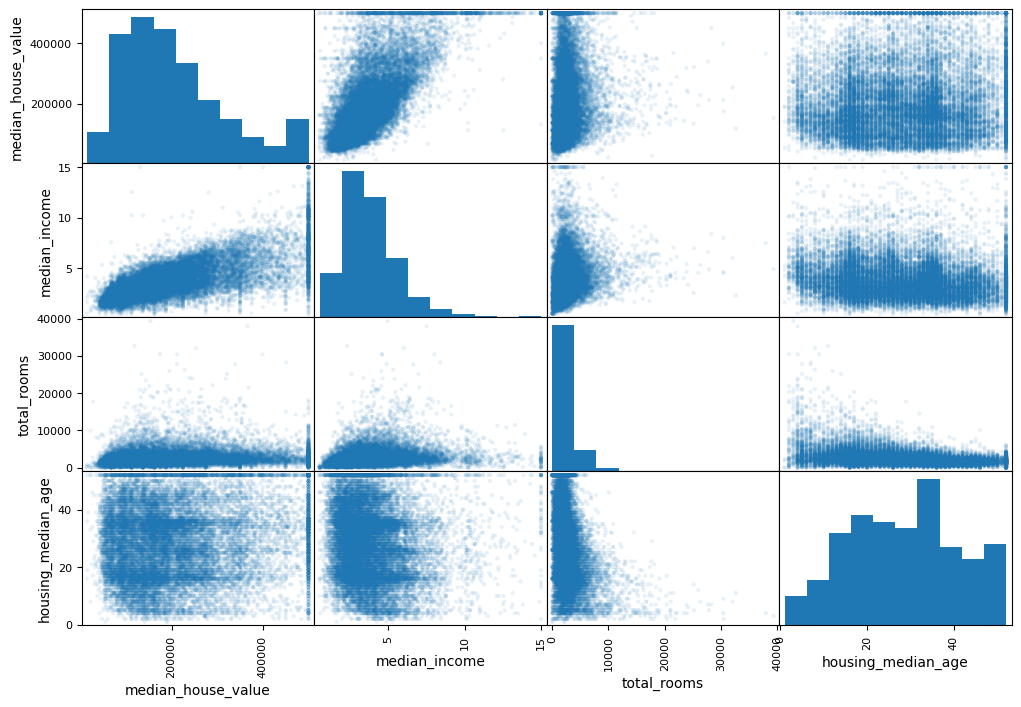

In [77]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8), alpha=0.1)


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

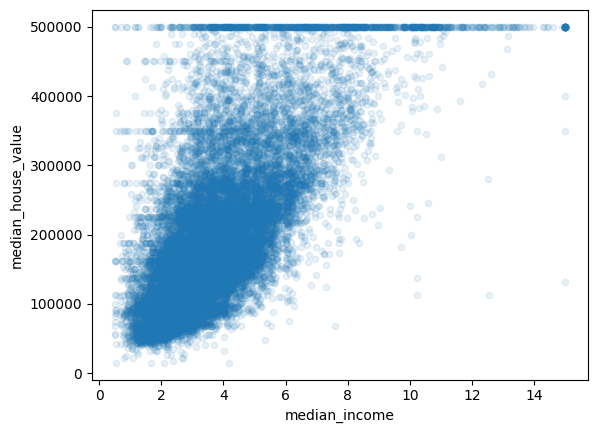

In [78]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [80]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [91]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [93]:
median = housing["total_bedrooms"].median()  # opção  3
housing["total_bedrooms"].fillna(median, inplace=True)

In [95]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,0.205784,3.168555,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,0.160714,2.623698,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,5.393333,0.191595,2.223333,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,0.276505,1.859213,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,0.182692,3.167241,3.0


In [104]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [106]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00,  3.00000000e+00])

In [107]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00,  3.00000000e+00])

In [108]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [109]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [110]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2])

In [112]:
housing_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [115]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [116]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [121]:
from sklearn.preprocessing import OrdenalEncoder

cat_encoder = OrdenalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

ImportError: cannot import name 'OrdenalEncoder' from 'sklearn.preprocessing' (/Users/rpaiter/ml/env/lib/python3.9/site-packages/sklearn/preprocessing/__init__.py)

In [133]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
   
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room: 
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
            return np.c_[X, rooms_per_household, population_per_household]
            
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
print(attr_adder)
housing_extra_attribs = attr_adder.transform(housing.values)


CombinedAttributesAdder(add_bedrooms_per_room=False)


In [132]:
print(housing_extra_attribs)

None


In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
       ('imputer', SimpleImputer(strategy="median")),
       ('attribs_adder', CombinedAttributesAdder()),
       ('std_scaler', StandardScaler()),
   ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
 
print(housing_num_tr)

[[-0.94135046  1.34743822  0.02756357 ...  0.01739526  0.00622264
  -0.12112176]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.56925554 -0.04081077
  -0.81086696]
 [ 0.26758118 -0.1259716   1.22045984 ... -0.01802432 -0.07537122
  -0.33827252]
 ...
 [-1.5707942   1.31001828  1.53856552 ... -0.5092404  -0.03743619
   0.32286937]
 [-1.56080303  1.2492109  -1.1653327  ...  0.32814891 -0.05915604
  -0.45702273]
 [-1.28105026  2.02567448 -0.13148926 ...  0.01407228  0.00657083
  -0.12169672]]


In [137]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [142]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

cat_pipeline = Pipeline([
       ('selector', DataFrameSelector(num_attribs)),
       ('imputer', SimpleImputer(strategy="median")),
       ('attribs_adder', CombinedAttributesAdder()),
       ('std_scaler', StandardScaler()),
])

In [143]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline),
            ("cat_pipeline", cat_pipeline),
])


In [144]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [151]:
# Treinamento Regressão Linear funcional

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [147]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 87325.32237161 305949.32237161 161757.32237161 179357.32237161
 232093.32237161]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [148]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68497.44698281283

In [149]:
# Treinaremos um DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [150]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [152]:
# O Codigo executa a validação cruzada K-fold

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [153]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [77323.5047376  73443.49100075 70115.43106253 74442.3477279
 71692.77449816 76911.76962532 71978.82223822 73049.49731066
 68325.64063497 72961.28466444]
Mean: 73024.4563500544
Standard deviation: 2630.4309484610726


In [154]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                                 scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71358.25100379 64433.34709847 67789.64939676 68740.6278214
 66804.53189656 72315.14455015 70612.33562017 68901.99334339
 66142.90420145 70185.71601163]
Mean: 68728.45009437606
Standard deviation: 2349.444815655178


In [ ]:
# Treinamento RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


forest_rmse
display_scores(forest_rmse_scores)

In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = [
   {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
   {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [159]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [161]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [162]:
cvres = grid_search.cv_results_
    
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

68521.56766076408 {'max_features': 2, 'n_estimators': 3}
60348.24647688459 {'max_features': 2, 'n_estimators': 10}
57502.93505420291 {'max_features': 2, 'n_estimators': 30}
65292.43280533866 {'max_features': 4, 'n_estimators': 3}
57408.75987525083 {'max_features': 4, 'n_estimators': 10}
55264.05693372079 {'max_features': 4, 'n_estimators': 30}
63259.25023043091 {'max_features': 6, 'n_estimators': 3}
56612.612678004705 {'max_features': 6, 'n_estimators': 10}
53996.62891747774 {'max_features': 6, 'n_estimators': 30}
63895.35477698843 {'max_features': 8, 'n_estimators': 3}
55925.78614683353 {'max_features': 8, 'n_estimators': 10}
53765.83885606069 {'max_features': 8, 'n_estimators': 30}
68160.45739431394 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
59536.9742641291 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
64923.09420687269 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
57686.38708846578 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [163]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.03877113, 0.03687521, 0.02502307, 0.00733131, 0.00799187,
       0.00767196, 0.0081999 , 0.17667103, 0.01098314, 0.01225415,
       0.03790293, 0.08649548, 0.01596807, 0.03259027, 0.01002772,
       0.03637019, 0.03702071, 0.02837455, 0.0069016 , 0.00765521,
       0.00742375, 0.0069692 , 0.18766762, 0.0111158 , 0.02507707,
       0.0341474 , 0.03362408, 0.01202537, 0.0336727 , 0.01719753])

In [167]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
#attributes = num_attribs + extra_attribs + cat_one_hot_attribs
attributes = num_attribs + extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.17667103473836623, 'median_income'),
 (0.08649547510679613, 'income_cat'),
 (0.03877112743194467, 'longitude'),
 (0.03790293228961589, 'population_per_household'),
 (0.03687521162267028, 'latitude'),
 (0.0325902650817332, 'pop_per_hhold'),
 (0.02502306518456941, 'housing_median_age'),
 (0.01596806805260373, 'rooms_per_hhold'),
 (0.012254151140192458, 'bedrooms_per_room'),
 (0.010983142327053252, 'rooms_per_household'),
 (0.01002771529113444, 'bedrooms_per_room'),
 (0.008199903577130345, 'households'),
 (0.007991865739010246, 'total_bedrooms'),
 (0.0076719561909835456, 'population'),
 (0.007331311163994507, 'total_rooms')]

In [169]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1) 
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)

In [170]:
housing["income_cat"].value_counts()

3.0    5789
2.0    5265
4.0    2911
5.0    1890
1.0     657
Name: income_cat, dtype: int64

NameError: name 'PROJECT_ROOT_DIR' is not defined